In [95]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import punch_party_utils


In [87]:
facilities_df = punch_party_utils.make_facilities_df()

# Question here: are facilities per state trending up or down, and how much does this vary state-by-state?
columns_relevant_to_question = ["State Name", "Year"]
facilities_df = facilities_df[columns_relevant_to_question]

display(facilities_df.head())

/home/sean/msse/data200S/TeamPunchParty/punch_party_utils.py:19: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  facilities_df = pd.read_csv(filename)


,State Name,Year
0,TEXAS,2012.0
1,LOUISIANA,2011.0
2,TENNESSEE,2017.0
3,FLORIDA,2015.0
5,GEORGIA,2011.0


In [88]:
facilities_with_counts = facilities_df.groupby(columns_relevant_to_question).value_counts()

facilities_by_state_by_year_df = facilities_with_counts.reset_index()

display(facilities_by_state_by_year_df[facilities_by_state_by_year_df["State Name"] == "ALABAMA"])

,State Name,Year,count
0,ALABAMA,2010.0,153
1,ALABAMA,2011.0,167
2,ALABAMA,2012.0,175
3,ALABAMA,2013.0,176
4,ALABAMA,2014.0,178
5,ALABAMA,2015.0,176
6,ALABAMA,2016.0,175
7,ALABAMA,2017.0,175
8,ALABAMA,2018.0,175
9,ALABAMA,2019.0,170


In [89]:
def make_model_for_state(state_facilities_counts):
    state_facilities_counts = state_facilities_counts.sort_values(by=["Year"])
    y_values = state_facilities_counts["count"]
    x_values = np.array(state_facilities_counts["Year"]).reshape(-1, 1)
    scalar = StandardScaler()
    x_values = scalar.fit_transform(x_values)
    model = LinearRegression()
    model.fit(x_values, y_values)
    return model, scalar


In [90]:
state_models = {}
for state in np.unique(facilities_by_state_by_year_df["State Name"]):
    model, scalar = make_model_for_state(facilities_by_state_by_year_df[facilities_by_state_by_year_df["State Name"] == state])
    state_models[state] = (model, scalar)

# display(state_models)

In [94]:
predictions= {}

for state in state_models.keys():
    (model, scalar) = state_models[state]
    prediction_year = np.array([2050]).reshape(-1, 1)
    prediction_year_normalized = scalar.transform(prediction_year)
    predictions[state] = np.round(model.predict(prediction_year_normalized))

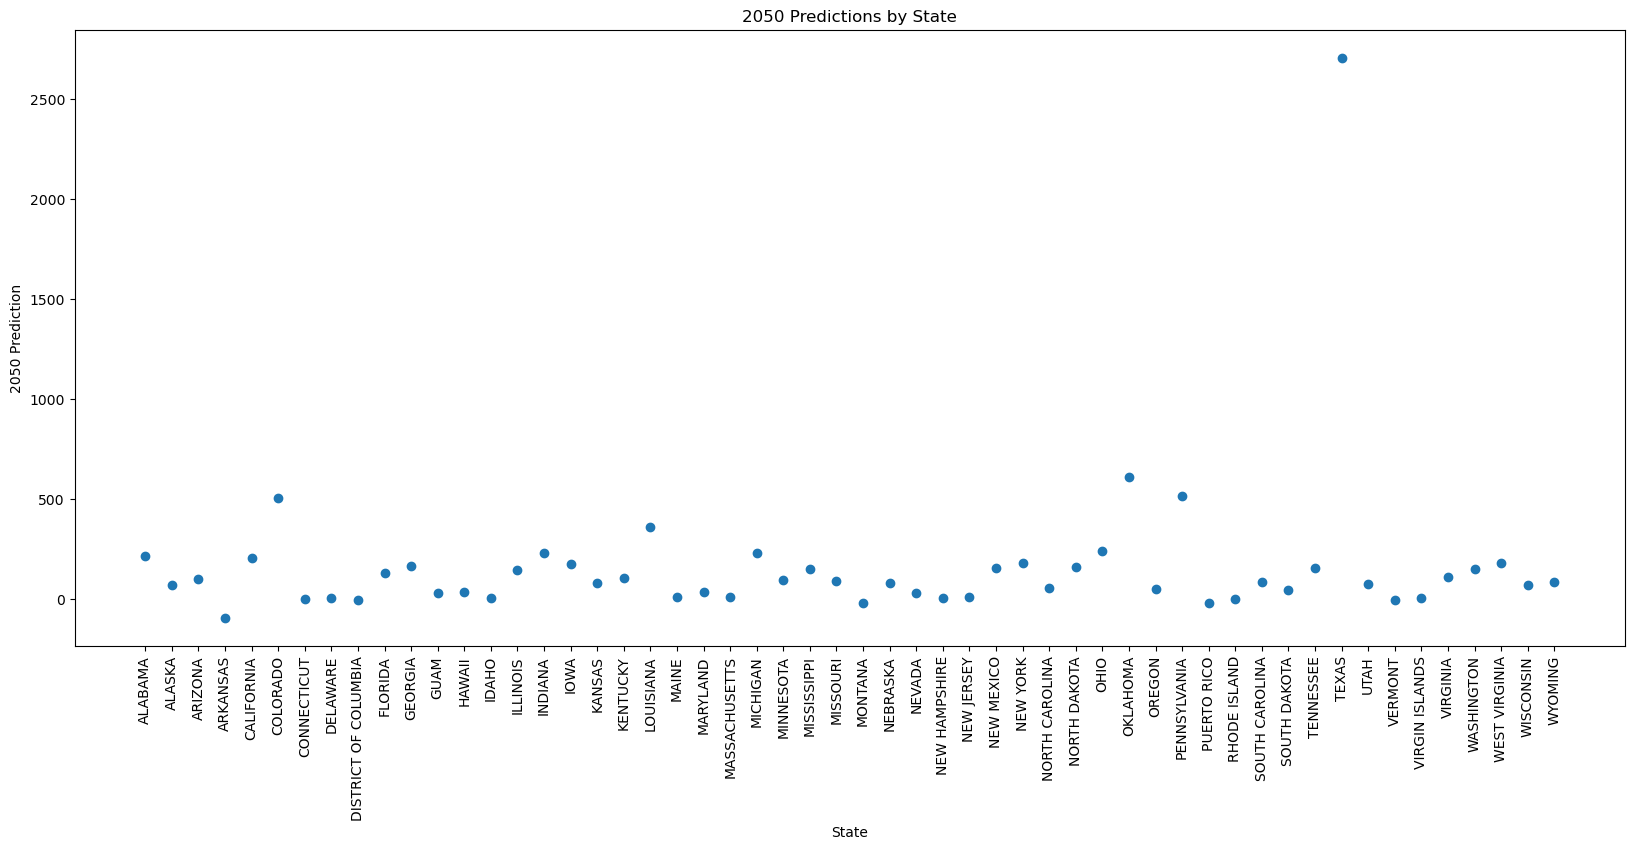

In [105]:
# Unpacking the data
states = list(predictions.keys())
prediction_values = [pred[0] for pred in predictions.values()]

plt.figure(figsize = (20, 8))

# Creating the scatter plot
plt.scatter(states, prediction_values)
plt.xlabel('State')
plt.ylabel('2050 Prediction')
plt.title('2050 Predictions by State')
plt.xticks(rotation=90)
plt.show()

plt.savefig("2050_predictions.png")

In [103]:
print(facilities_by_state_by_year_df[facilities_by_state_by_year_df["State Name"] == "TEXAS"])

    State Name    Year  count
450      TEXAS  2010.0    592
451      TEXAS  2011.0    861
452      TEXAS  2012.0    926
453      TEXAS  2013.0    934
454      TEXAS  2014.0    990
455      TEXAS  2015.0    991
456      TEXAS  2016.0   1075
457      TEXAS  2017.0   1098
458      TEXAS  2018.0   1130
459      TEXAS  2019.0   1136


In [102]:
print(predictions["TEXAS"])

[2708.]
